In [1]:
# reading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/content/loan-train.csv')
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [2]:
# handle null data
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
# column credit_history
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
# column gender
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
# column loan_amount_term
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
# column dependents
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
# column self employed
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
# column married
data=data[data['Married'].notna()]
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [3]:
# convert str to number
data.replace({'Married':{'No':0,'Yes':1},
'Gender':{'Male':1,'Female':0},
'Self_Employed':{'No':0,'Yes':1},
'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
data.replace({"Dependents":{'3+':'3'}},inplace=True)

data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,Y
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,Y
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,N
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,Y
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,N


In [4]:
data['Loan_Status']=data['Loan_Status'].replace(['N','Y'],[0,1])
# data['Loan_Status'].replace('Y',1)
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [5]:
# split data to x , y
y=data['Loan_Status']
x=data.drop(['Loan_Status','Loan_ID'],axis=1)

In [6]:
# split the data into traning and test
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
model=DecisionTreeClassifier( max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[9] <= 0.5\ngini = 0.431\nsamples = 427\nvalue = [134, 293]'),
 Text(0.3, 0.625, 'x[7] <= 547.5\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.2, 0.375, 'x[6] <= 6623.0\ngini = 0.146\nsamples = 63\nvalue = [58, 5]'),
 Text(0.1, 0.125, 'gini = 0.123\nsamples = 61\nvalue = [57, 4]'),
 Text(0.3, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.625, 'x[5] <= 530.5\ngini = 0.331\nsamples = 363\nvalue = [76, 287]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'x[5] <= 3345.5\ngini = 0.326\nsamples = 361\nvalue = [74, 287]'),
 Text(0.7, 0.125, 'gini = 0.22\nsamples = 135\nvalue = [17, 118]'),
 Text(0.9, 0.125, 'gini = 0.377\nsamples = 226\nvalue = [57, 169]')]

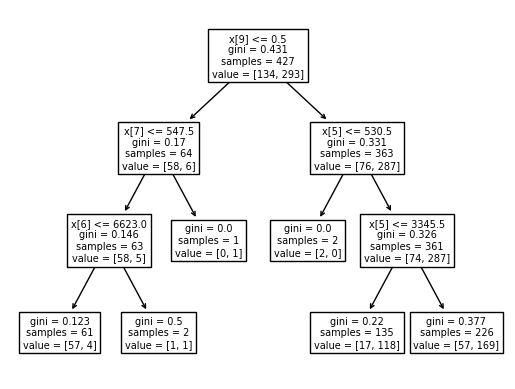

In [10]:
plot_tree(model)

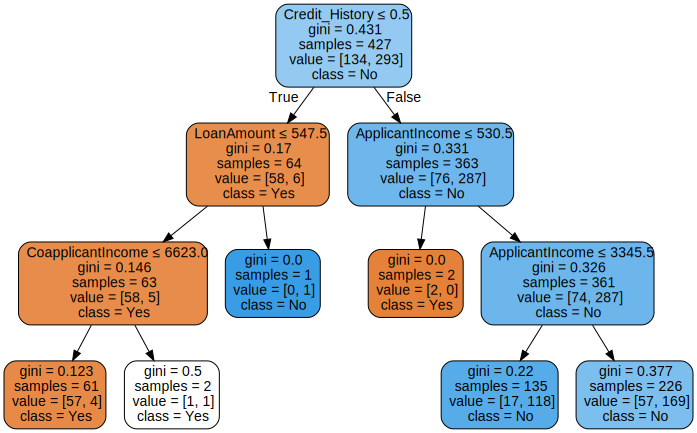

In [11]:
import graphviz
dot_data=export_graphviz(model, out_file= None, feature_names=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
    class_names=['Yes','No'],filled=True, rounded=True, special_characters=True)
graph=graphviz.Source(dot_data)
graph.render("Gini")
graph

In [12]:
model.score(x_test,y_test)

0.8043478260869565